In [1]:
import numpy as np
from geomstats.information_geometry.normal import UnivariateNormalDistributions

from matplotlib import pyplot as plt

In [2]:
space = UnivariateNormalDistributions()

In [3]:
bounds = ((-6.0, 6.0), (0.4, 4.0))

num = 100
params = [
    np.linspace(lower_bound, higher_bound, num=num)
    for lower_bound, higher_bound in bounds
]

params_grid = np.stack(np.meshgrid(*params), axis=-1)

In [4]:
fisher = space.metric.metric_matrix(params_grid)

fisher.shape

(100, 100, 2, 2)

In [5]:
sigma_min, _ = bounds[1]
t = np.linspace(0.0, 1.0, num=100)

point_a = np.array(
    [
        [-6, sigma_min],
        [-5, sigma_min],
        [-4, sigma_min],
        [-3, sigma_min],
        [-2, sigma_min],
        [0, sigma_min],
        [0, sigma_min],
        [2, sigma_min],
    ],
)


point_b = np.array(
    [
        [0, sigma_min],
        [5, sigma_min],
        [4, sigma_min],
        [3, sigma_min],
        [2, sigma_min],
        [6, sigma_min],
        [-2, sigma_min],
        [0, sigma_min],
    ]
)

geod = space.metric.geodesic(point_a, point_b)(t)

geod.shape

(8, 100, 2)

<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_45591/1949669221.py:11: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel("$\mu$")
/tmp/ipykernel_45591/1949669221.py:12: SyntaxWarning: invalid escape sequence '\s'
  ax.set_ylabel("$\sigma$")


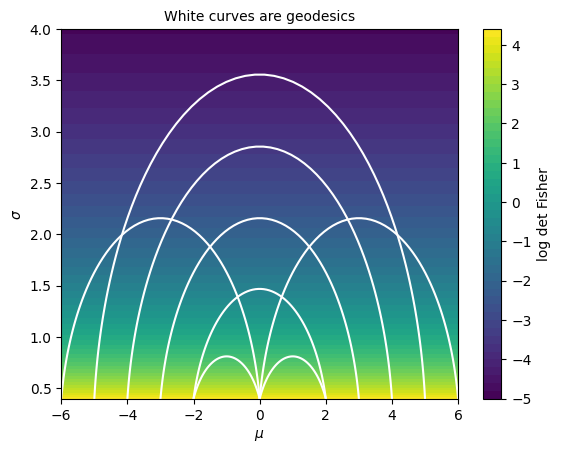

In [6]:
grid = params_grid
vals = np.log(np.linalg.det(fisher))

fig, ax = plt.subplots()

c = ax.contourf(grid[..., 0], grid[..., 1], vals, levels=50)

for geod_ in geod:
    ax.plot(geod_[:, 0], geod_[:, 1], color="white")

ax.set_xlabel("$\mu$")
ax.set_ylabel("$\sigma$")

ax.set_title("White curves are geodesics", size=10)

cbar = fig.colorbar(c, ax=ax)
cbar.set_label("log det Fisher")